# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time
from itertools import count
%matplotlib inline

from ddpg_agent import Agent


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

Episode 1, Average Score:0.54 Window Size:(1),Epi Score:0.54, Max Score: 0.54, Min Score: 0.54,Time per Episode: 12.81
Episode 2, Average Score:0.30 Window Size:(2),Epi Score:0.07, Max Score: 0.54, Min Score: 0.07,Time per Episode: 19.17
Episode 3, Average Score:0.35 Window Size:(3),Epi Score:0.43, Max Score: 0.54, Min Score: 0.07,Time per Episode: 19.14
Episode 4, Average Score:0.75 Window Size:(4),Epi Score:1.95, Max Score: 1.95, Min Score: 0.07,Time per Episode: 19.21
Episode 5, Average Score:0.71 Window Size:(5),Epi Score:0.58, Max Score: 1.95, Min Score: 0.07,Time per Episode: 19.20
Episode 6, Average Score:0.70 Window Size:(6),Epi Score:0.66, Max Score: 1.95, Min Score: 0.07,Time per Episode: 19.30
Episode 7, Average Score:0.63 Window Size:(7),Epi Score:0.21, Max Score: 1.95, Min Score: 0.07,Time per Episode: 19.31
Episode 8, Average Score:0.63 Window Size:(8),Epi Score:0.58, Max Score: 1.95, Min Score: 0.07,Time per Episode: 19.29
Episode 9, Average Score:0.57 Window Size:(9),Ep

Episode 69, Average Score:3.64 Window Size:(69),Epi Score:11.96, Max Score: 11.96, Min Score: 0.07,Time per Episode: 19.66
Episode 70, Average Score:3.72 Window Size:(70),Epi Score:8.66, Max Score: 11.96, Min Score: 0.07,Time per Episode: 19.76
Episode 71, Average Score:3.76 Window Size:(71),Epi Score:6.78, Max Score: 11.96, Min Score: 0.07,Time per Episode: 19.82
Episode 72, Average Score:3.82 Window Size:(72),Epi Score:8.00, Max Score: 11.96, Min Score: 0.07,Time per Episode: 19.75
Episode 73, Average Score:3.96 Window Size:(73),Epi Score:14.18, Max Score: 14.18, Min Score: 0.07,Time per Episode: 19.71
Episode 74, Average Score:4.02 Window Size:(74),Epi Score:8.62, Max Score: 14.18, Min Score: 0.07,Time per Episode: 19.71
Episode 75, Average Score:4.03 Window Size:(75),Epi Score:4.87, Max Score: 14.18, Min Score: 0.07,Time per Episode: 19.87
Episode 76, Average Score:4.06 Window Size:(76),Epi Score:6.03, Max Score: 14.18, Min Score: 0.07,Time per Episode: 19.70
Episode 77, Average Sc

Episode 135, Average Score:10.83 Window Size:(100),Epi Score:9.74, Max Score: 32.21, Min Score: 1.72,Time per Episode: 20.13
Episode 136, Average Score:11.07 Window Size:(100),Epi Score:28.85, Max Score: 32.21, Min Score: 1.72,Time per Episode: 20.35
Episode 137, Average Score:11.20 Window Size:(100),Epi Score:15.04, Max Score: 32.21, Min Score: 2.27,Time per Episode: 20.19
Episode 138, Average Score:11.38 Window Size:(100),Epi Score:20.17, Max Score: 32.21, Min Score: 2.66,Time per Episode: 20.40
Episode 139, Average Score:11.55 Window Size:(100),Epi Score:21.99, Max Score: 32.21, Min Score: 2.66,Time per Episode: 20.34
Episode 140, Average Score:11.69 Window Size:(100),Epi Score:19.61, Max Score: 32.21, Min Score: 2.66,Time per Episode: 20.48
Episode 141, Average Score:11.81 Window Size:(100),Epi Score:14.27, Max Score: 32.21, Min Score: 2.66,Time per Episode: 20.63
Episode 142, Average Score:11.96 Window Size:(100),Epi Score:18.60, Max Score: 32.21, Min Score: 2.66,Time per Episode:

Episode 201, Average Score:23.44 Window Size:(100),Epi Score:26.18, Max Score: 37.94, Min Score: 6.68,Time per Episode: 21.20
Episode 202, Average Score:23.52 Window Size:(100),Epi Score:19.32, Max Score: 37.94, Min Score: 6.68,Time per Episode: 20.80
Episode 203, Average Score:23.73 Window Size:(100),Epi Score:29.79, Max Score: 37.94, Min Score: 6.68,Time per Episode: 20.84
Episode 204, Average Score:23.91 Window Size:(100),Epi Score:31.25, Max Score: 37.94, Min Score: 6.68,Time per Episode: 20.89
Episode 205, Average Score:24.15 Window Size:(100),Epi Score:37.59, Max Score: 37.94, Min Score: 6.68,Time per Episode: 20.97
Episode 206, Average Score:24.41 Window Size:(100),Epi Score:38.43, Max Score: 38.43, Min Score: 6.68,Time per Episode: 21.05
Episode 207, Average Score:24.47 Window Size:(100),Epi Score:18.91, Max Score: 38.43, Min Score: 6.68,Time per Episode: 20.96
Episode 208, Average Score:24.63 Window Size:(100),Epi Score:25.82, Max Score: 38.43, Min Score: 6.68,Time per Episode

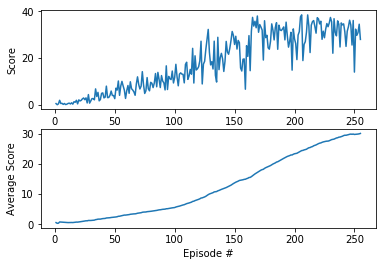

In [8]:
def ddpg(n_episodes=1000, max_t=1000, print_every=100,window_size=100):
    scores_deque = deque(maxlen=window_size) # last 100 scores
    episode_score_list = []                  # list containing scores from each episode
    Overall_average = []                     #List of 100/window mean scores
    scores = np.zeros(num_agents)            # initialize the score (for each agent)
    start_time = time.time()
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment 
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        
        average_score = 0
        time_step = time.time()
        for ts in range(max_t):
            actions = agent.act(states, add_noise=True)        # select an action (for each agent)
#            actions = agent.act(states)        # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send action to  environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done,ts)
                
#            agent.step(states, actions, rewards, next_states, dones,ts)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        episode_score_list.append(scores) # List of all scores in Episodde for agents
        scores_deque.append(scores)    # Making a of  window of 100 scores
        average_score = np.mean(scores_deque)  # Average/mean of  100/window 
        Overall_average.append(average_score)  # List of 100/window mean scores
        
#        print('\rEpisode {}, Average Score: {:.2f}, Max Score: {:.2f},  Time per Episode: {:.2f}'\
#              .format(i_episode, average_score, np.max(scores),  time.time() - time_step), end="\n")        
        print('\rEpisode {}, Average Score:{:.2f} Window Size:({:d}),Epi Score:{:.2f}, Max Score: {:.2f}, Min Score: {:.2f},Time per Episode: {:.2f}'\
              .format(i_episode, average_score,len(scores_deque),np.max(scores), np.max(scores_deque),np.min(scores_deque), time.time() - time_step), end="\n")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_all.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_all.pth')
            
        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Window Score for a window of 100: {:.2f}'.format(i_episode, average_score))   
            
        if average_score >= 30.0 and i_episode >= 100 :  
                end_time = time.time()
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_plus_30.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_plus_30.pth')
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}, training time: {}'\
                      .format(i_episode, average_score, end_time-start_time))
                break
           
    return episode_score_list, Overall_average



scores, averages = ddpg()

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

plt.subplot(2, 1, 2)
plt.plot(np.arange(1, len(scores)+1), averages)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
#For all episodes
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_all.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_all.pth'))

In [11]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))



Total score (averaged over agents) this episode: 29.459999341517687


In [12]:
# Every 100 Episode
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [13]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 36.82999917678535


In [14]:
# For all episode
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_plus_30.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_plus_30.pth'))

In [15]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 30.349999321624637


In [16]:
env.close()